In [14]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

# Libraries

In [15]:
import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import FreqDist

In [4]:
!python -m spacy download es_dep_news_trf -q  #in english !python -m spacy download en_core_web_trf
import spacy

✔ Download and installation successful
You can now load the package via spacy.load('es_dep_news_trf')


In [16]:
import pandas as pd 
import numpy as np 
import re 

In [18]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline


# Constants

In [105]:
DATA_PATH = '../DATA/news_125k.csv'

# Bespoke Functions

In [106]:
def freq_words(x, terms=30): 
    '''Display the most frequent terms of the a given corpus'''
    all_words = ' '.join([text for text in x]) 
    all_words = all_words.split() 
  
    fdist = FreqDist(all_words) 
    words_df = pd.DataFrame({'word':list(fdist.keys()),   
                             'count':list(fdist.values())}) 
    # selecting top n most frequent words 
    d = words_df.nlargest(columns="count", n=terms)      
    plt.figure(figsize=(20,5)) 
    ax = sns.barplot(data=d, x="word", y="count") 
    ax.set(ylabel='Count')
    plt.xticks(rotation=90)
    plt.show()

# Import data

In [110]:
df = pd.read_csv(DATA_PATH, index_col=0)
df.head()

,title,body,topic,votes,clicks,comments
0,"Muere Toni Batllori, autor de la tira diaria d...",Toni Batllori Obiols ha fallecido esta noche e...,Culture,144,1100,11
1,La anarquía explicada a los niños por José A. ...,"En 1931 el maestro José Antonio Emmanuel, y me...",Culture,196,1800,109
2,"Rhianan Rudd, la adolescente a la que el MI5 a...","Rhianan Rudd, una adolescente de 14 años que v...",Latest,330,6100,77
3,Piden por burofax al obispo de Cartagena que r...,"La catedral de Murcia, la iglesia de El Salvad...",Politics,410,881,54
4,Érase una vez... (1950),Érase una vez... (1950) dirigida por Josep Esc...,Culture,114,100,9


# Preprocessing

### Create a text column

In [111]:
df['text'] = df['title'] + ' ' + df['body']
df['text']

0         Muere Toni Batllori, autor de la tira diaria d...
1         La anarquía explicada a los niños por José A. ...
2         Rhianan Rudd, la adolescente a la que el MI5 a...
3         Piden por burofax al obispo de Cartagena que r...
4         Érase una vez... (1950) Érase una vez... (1950...
                                ...                        
123792    El juez descubre un traspaso de 150.000 euros ...
123793    La admiración de Isaac Asimov por Carl Sagan L...
123794    El hombre con 59.000 libros... en su casa (ENG...
123795    La BBC habla de "bronca por el peaje solar" en...
123860    Multa millonaria a Tesla por exagerar autonomí...
Name: text, Length: 123500, dtype: object

### Text cleaning

#### Remove punctuation

In [112]:
df['clean_text'] = df['text'].str.replace(r'[^\w\s]+', '') 
df['clean_text']

/var/folders/8f/gg3d93d120s3hxst3s0295kc0000gn/T/ipykernel_2387/1860464631.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['clean_text'] = df['text'].str.replace(r'[^\w\s]+', '')


0         Muere Toni Batllori autor de la tira diaria de...
1         La anarquía explicada a los niños por José A E...
2         Rhianan Rudd la adolescente a la que el MI5 ac...
3         Piden por burofax al obispo de Cartagena que r...
4         Érase una vez 1950 Érase una vez 1950 dirigida...
                                ...                        
123792    El juez descubre un traspaso de 150000 euros d...
123793    La admiración de Isaac Asimov por Carl Sagan L...
123794    El hombre con 59000 libros en su casa ENG En l...
123795    La BBC habla de bronca por el peaje solar en E...
123860    Multa millonaria a Tesla por exagerar autonomí...
Name: clean_text, Length: 123500, dtype: object

### Tokenize, Lemmatization and removing Stop Words

#### Importing necessary things

In [12]:
# stop_words = set(stopwords.words("spanish"))  # you need to change this to "english"
nlp = spacy.load('es_dep_news_trf')  # you need to go for the english version "en_core_web_trf"

#### Tokenize using spaCy, getting token.lemma_ and removing stop words token.is_stop

In [13]:
# in multiple steps, but not working super-great as some lemmatized words are not removed ('el', for instance)
# it is better to use the attribute .is_stop of the spacy token without looking for it elsewhere.
# df['token'] = df['clean_text'].fillna('').apply(lambda x: nlp(x))
# df['token_lemma'] = df['token'].apply(lambda x: [token.lemma_ for token in x if token.text not in stop_words])

In [14]:
%%time
df['token_lemma'] = df['clean_text'].apply(lambda text: 
                                           " ".join(token.lemma_ for token in nlp(text) 
                                           if not token.is_stop))
df.head()

CPU times: user 23h 41min 10s, sys: 16min 32s, total: 23h 57min 42s
Wall time: 6h 1min 51s


,Unnamed: 0,title,body,topic,votes,clicks,comments,text,clean_text,token_lemma
0,0,"Muere Toni Batllori, autor de la tira diaria d...",Toni Batllori Obiols ha fallecido esta noche e...,Culture,144,1100,11,"Muere Toni Batllori, autor de la tira diaria d...",Muere Toni Batllori autor de la tira diaria de...,morir Toni Batllori autor tira diario Vanguard...
1,1,La anarquía explicada a los niños por José A. ...,"En 1931 el maestro José Antonio Emmanuel, y me...",Culture,196,1800,109,La anarquía explicada a los niños por José A. ...,La anarquía explicada a los niños por José A E...,anarquía explicado niño José Emmanuel 1931 mae...
2,2,"Rhianan Rudd, la adolescente a la que el MI5 a...","Rhianan Rudd, una adolescente de 14 años que v...",Latest,330,6100,77,"Rhianan Rudd, la adolescente a la que el MI5 a...",Rhianan Rudd la adolescente a la que el MI5 ac...,Rhianan Rudd adolescente MI5 acusar terrorismo...
3,3,Piden por burofax al obispo de Cartagena que r...,"La catedral de Murcia, la iglesia de El Salvad...",Politics,410,881,54,Piden por burofax al obispo de Cartagena que r...,Piden por burofax al obispo de Cartagena que r...,pedir burofax obispo Cartagena retirar símbolo...
4,4,Érase una vez... (1950),Érase una vez... (1950) dirigida por Josep Esc...,Culture,114,100,9,Érase una vez... (1950) Érase una vez... (1950...,Érase una vez 1950 Érase una vez 1950 dirigida...,érar 1950 era él 1950 dirigido Josep Escobar Z...
...,...,...,...,...,...,...,...,...,...,...
123495,123792,El juez descubre un traspaso de 150.000 euros ...,"El instructor del caso Noos, José Castro, acab...",Latest,1200,1200,46,El juez descubre un traspaso de 150.000 euros ...,El juez descubre un traspaso de 150000 euros d...,juez descubrir traspaso 150000 euros Aizóon In...
123496,123793,La admiración de Isaac Asimov por Carl Sagan,La historia nos ha relatado muchas historias a...,Latest,498,500,130,La admiración de Isaac Asimov por Carl Sagan L...,La admiración de Isaac Asimov por Carl Sagan L...,admiración Isaac Asimov Carl Sagan historia re...
123497,123794,El hombre con 59.000 libros... en su casa (ENG),"En la década de 1920, Lawrence L. Thomas, un d...",Latest,270,9400,68,El hombre con 59.000 libros... en su casa (ENG...,El hombre con 59000 libros en su casa ENG En l...,hombre 59000 libro casa ENG década 1920 Lawren...
123498,123795,"La BBC habla de ""bronca por el peaje solar"" en...",La TV pública británica resalta las críticas y...,Latest,1200,2500,30,"La BBC habla de ""bronca por el peaje solar"" en...",La BBC habla de bronca por el peaje solar en E...,BBC bronca peaje solar España TV público britá...


# Keyword extraction

In [18]:
%%time
tags = ['NOUN', 'ADJ', 'VERB']
df['noun_adj_verb'] = df['token_lemma'].apply(lambda text: 
                                           " ".join(token.lemma_ for token in nlp(text) 
                                           if token.pos_ in tags))
df

CPU times: user 15h 22min 48s, sys: 10min 25s, total: 15h 33min 14s
Wall time: 3h 54min 34s


,Unnamed: 0,title,body,topic,votes,clicks,comments,text,clean_text,token_lemma,noun_adj_verb
0,0,"Muere Toni Batllori, autor de la tira diaria d...",Toni Batllori Obiols ha fallecido esta noche e...,Culture,144,1100,11,"Muere Toni Batllori, autor de la tira diaria d...",Muere Toni Batllori autor de la tira diaria de...,morir Toni Batllori autor tira diario Vanguard...,morir autor tirar diario fallecer noche domici...
1,1,La anarquía explicada a los niños por José A. ...,"En 1931 el maestro José Antonio Emmanuel, y me...",Culture,196,1800,109,La anarquía explicada a los niños por José A. ...,La anarquía explicada a los niños por José A E...,anarquía explicado niño José Emmanuel 1931 mae...,anarquía explicado niño maestro publicar panfl...
2,2,"Rhianan Rudd, la adolescente a la que el MI5 a...","Rhianan Rudd, una adolescente de 14 años que v...",Latest,330,6100,77,"Rhianan Rudd, la adolescente a la que el MI5 a...",Rhianan Rudd la adolescente a la que el MI5 ac...,Rhianan Rudd adolescente MI5 acusar terrorismo...,adolescente acusar terrorismo acabar suicidar ...
3,3,Piden por burofax al obispo de Cartagena que r...,"La catedral de Murcia, la iglesia de El Salvad...",Politics,410,881,54,Piden por burofax al obispo de Cartagena que r...,Piden por burofax al obispo de Cartagena que r...,pedir burofax obispo Cartagena retirar símbolo...,pedir burofax obispo retirar símbolo franquist...
4,4,Érase una vez... (1950),Érase una vez... (1950) dirigida por Josep Esc...,Culture,114,100,9,Érase una vez... (1950) Érase una vez... (1950...,Érase una vez 1950 Érase una vez 1950 dirigida...,érar 1950 era él 1950 dirigido Josep Escobar Z...,érar 1950 1950 dirigido película entero hija c...
...,...,...,...,...,...,...,...,...,...,...,...
123495,123792,El juez descubre un traspaso de 150.000 euros ...,"El instructor del caso Noos, José Castro, acab...",Latest,1200,1200,46,El juez descubre un traspaso de 150.000 euros ...,El juez descubre un traspaso de 150000 euros d...,juez descubrir traspaso 150000 euros Aizóon In...,juez descubrir traspaso euros instructor caso ...
123496,123793,La admiración de Isaac Asimov por Carl Sagan,La historia nos ha relatado muchas historias a...,Latest,498,500,130,La admiración de Isaac Asimov por Carl Sagan L...,La admiración de Isaac Asimov por Carl Sagan L...,admiración Isaac Asimov Carl Sagan historia re...,admiración historia relatar historia admiració...
123497,123794,El hombre con 59.000 libros... en su casa (ENG),"En la década de 1920, Lawrence L. Thomas, un d...",Latest,270,9400,68,El hombre con 59.000 libros... en su casa (ENG...,El hombre con 59000 libros en su casa ENG En l...,hombre 59000 libro casa ENG década 1920 Lawren...,hombre libro casa década hijo deseado nacido r...
123498,123795,"La BBC habla de ""bronca por el peaje solar"" en...",La TV pública británica resalta las críticas y...,Latest,1200,2500,30,"La BBC habla de ""bronca por el peaje solar"" en...",La BBC habla de bronca por el peaje solar en E...,BBC bronca peaje solar España TV público britá...,peaje solar público británico resaltar crítica...


In [20]:
%%time
removal = ['ADV','PRON','CCONJ','PUNCT','PART','DET','ADP','SPACE', 'NUM', 'SYM']
df['token_lemma_relevant'] = df['token_lemma'].apply(lambda text: 
                                                       " ".join(token.lemma_ for token in nlp(text) 
                                                       if token.pos_ not in removal))
df

,Unnamed: 0,title,body,topic,votes,clicks,comments,text,clean_text,token_lemma,noun_adj_verb,token_lemma_relevant
0,0,"Muere Toni Batllori, autor de la tira diaria d...",Toni Batllori Obiols ha fallecido esta noche e...,Culture,144,1100,11,"Muere Toni Batllori, autor de la tira diaria d...",Muere Toni Batllori autor de la tira diaria de...,morir Toni Batllori autor tira diario Vanguard...,morir autor tirar diario fallecer noche domici...,morir Toni Batllori autor tirar diario Vanguar...
1,1,La anarquía explicada a los niños por José A. ...,"En 1931 el maestro José Antonio Emmanuel, y me...",Culture,196,1800,109,La anarquía explicada a los niños por José A. ...,La anarquía explicada a los niños por José A E...,anarquía explicado niño José Emmanuel 1931 mae...,anarquía explicado niño maestro publicar panfl...,anarquía explicado niño José Emmanuel maestro ...
2,2,"Rhianan Rudd, la adolescente a la que el MI5 a...","Rhianan Rudd, una adolescente de 14 años que v...",Latest,330,6100,77,"Rhianan Rudd, la adolescente a la que el MI5 a...",Rhianan Rudd la adolescente a la que el MI5 ac...,Rhianan Rudd adolescente MI5 acusar terrorismo...,adolescente acusar terrorismo acabar suicidar ...,Rhianan Rudd adolescente MI5 acusar terrorismo...
3,3,Piden por burofax al obispo de Cartagena que r...,"La catedral de Murcia, la iglesia de El Salvad...",Politics,410,881,54,Piden por burofax al obispo de Cartagena que r...,Piden por burofax al obispo de Cartagena que r...,pedir burofax obispo Cartagena retirar símbolo...,pedir burofax obispo retirar símbolo franquist...,pedir burofax obispo Cartagena retirar símbolo...
4,4,Érase una vez... (1950),Érase una vez... (1950) dirigida por Josep Esc...,Culture,114,100,9,Érase una vez... (1950) Érase una vez... (1950...,Érase una vez 1950 Érase una vez 1950 dirigida...,érar 1950 era él 1950 dirigido Josep Escobar Z...,érar 1950 1950 dirigido película entero hija c...,érar 1950 ser 1950 dirigido Josep Escobar Zipi...
...,...,...,...,...,...,...,...,...,...,...,...,...
123495,123792,El juez descubre un traspaso de 150.000 euros ...,"El instructor del caso Noos, José Castro, acab...",Latest,1200,1200,46,El juez descubre un traspaso de 150.000 euros ...,El juez descubre un traspaso de 150000 euros d...,juez descubrir traspaso 150000 euros Aizóon In...,juez descubrir traspaso euros instructor caso ...,juez descubrir traspaso euros Aizóon Infanta i...
123496,123793,La admiración de Isaac Asimov por Carl Sagan,La historia nos ha relatado muchas historias a...,Latest,498,500,130,La admiración de Isaac Asimov por Carl Sagan L...,La admiración de Isaac Asimov por Carl Sagan L...,admiración Isaac Asimov Carl Sagan historia re...,admiración historia relatar historia admiració...,admiración Isaac Asimov Carl Sagan historia re...
123497,123794,El hombre con 59.000 libros... en su casa (ENG),"En la década de 1920, Lawrence L. Thomas, un d...",Latest,270,9400,68,El hombre con 59.000 libros... en su casa (ENG...,El hombre con 59000 libros en su casa ENG En l...,hombre 59000 libro casa ENG década 1920 Lawren...,hombre libro casa década hijo deseado nacido r...,hombre libro casa ENG década Lawrence L Thomas...
123498,123795,"La BBC habla de ""bronca por el peaje solar"" en...",La TV pública británica resalta las críticas y...,Latest,1200,2500,30,"La BBC habla de ""bronca por el peaje solar"" en...",La BBC habla de bronca por el peaje solar en E...,BBC bronca peaje solar España TV público britá...,peaje solar público británico resaltar crítica...,BBC bronca peaje solar España TV público britá...


# Frequent Words

### Dataset

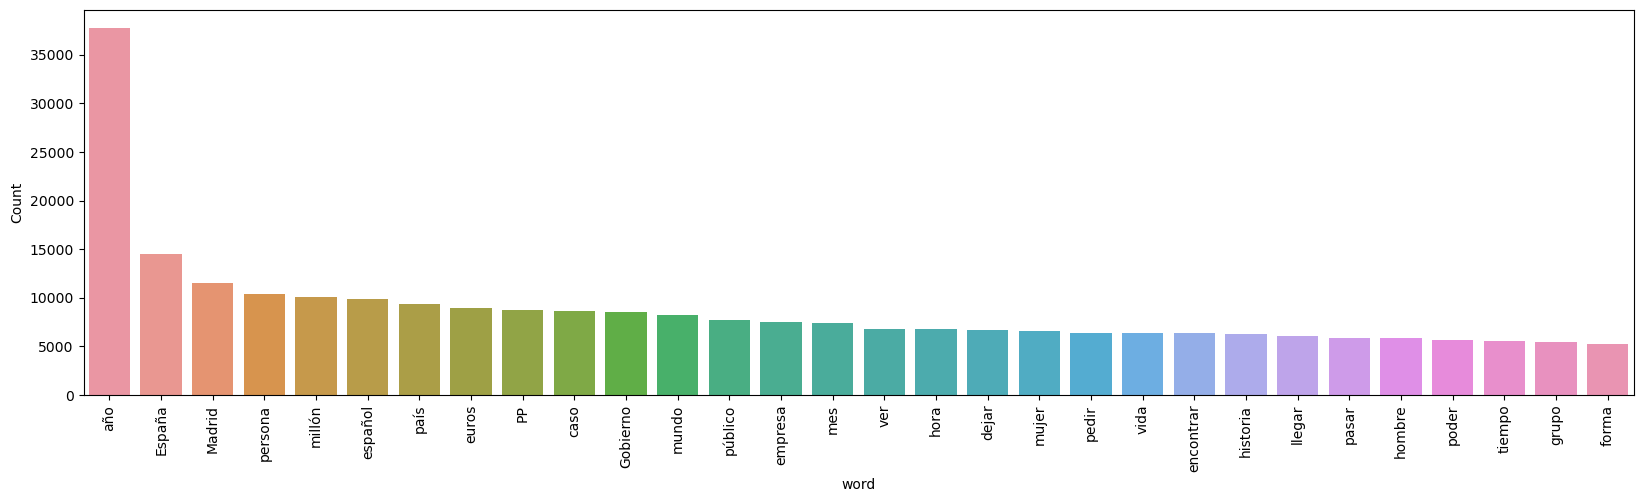

In [45]:
freq_words(df['token_lemma_relevant'], terms=30)

### By category

Culture:


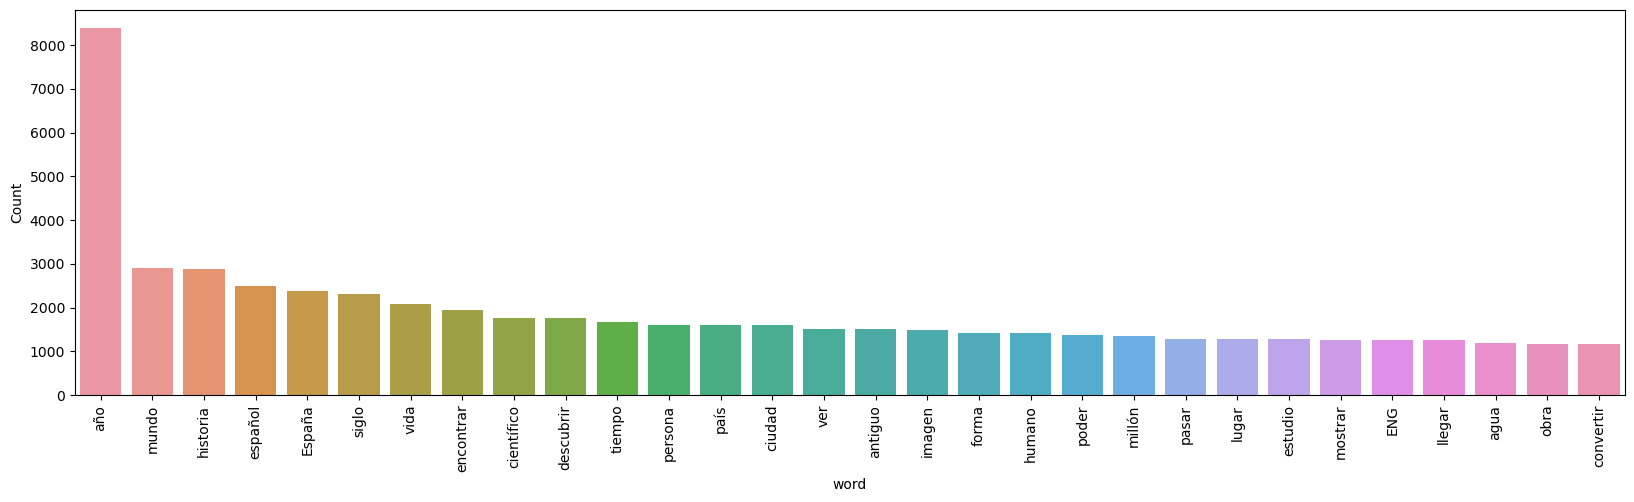

------------
Latest:


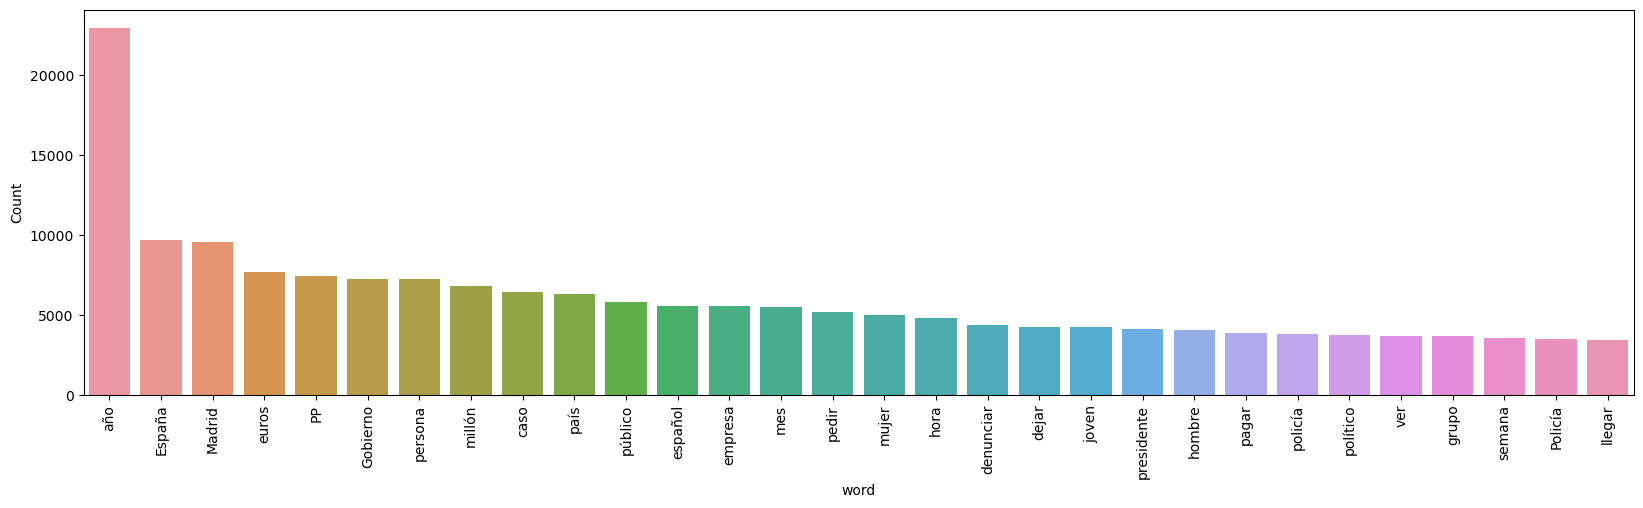

------------
Politics:


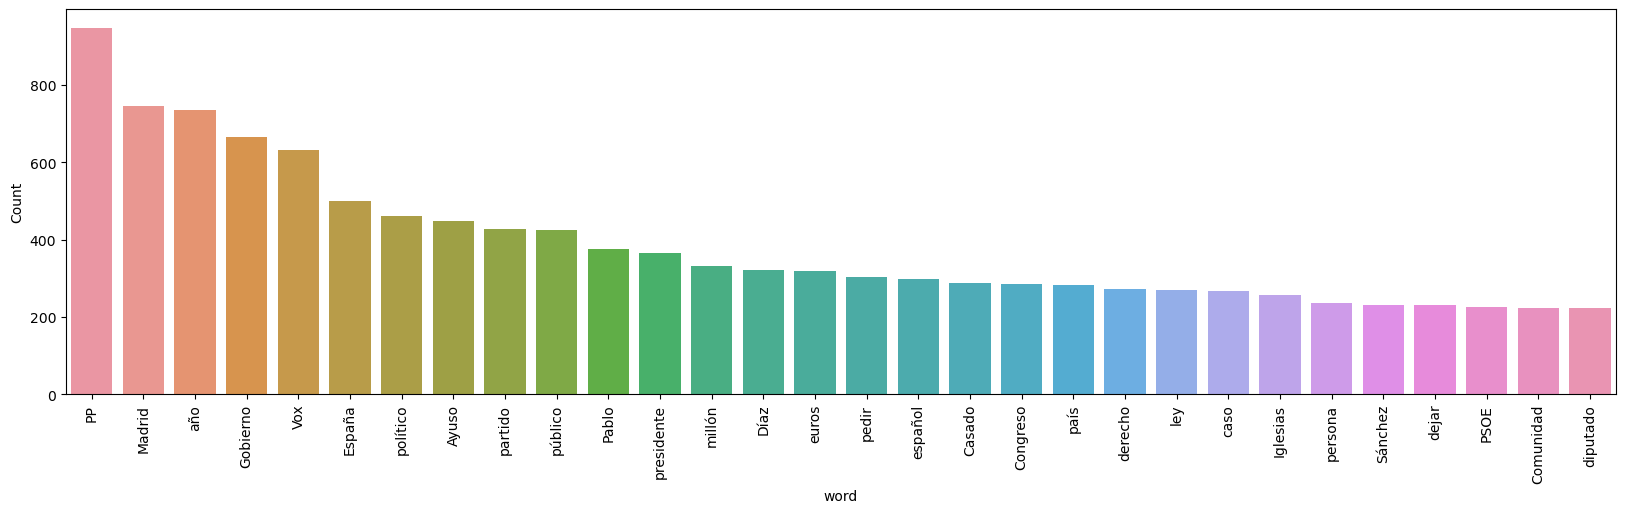

------------
Technology:


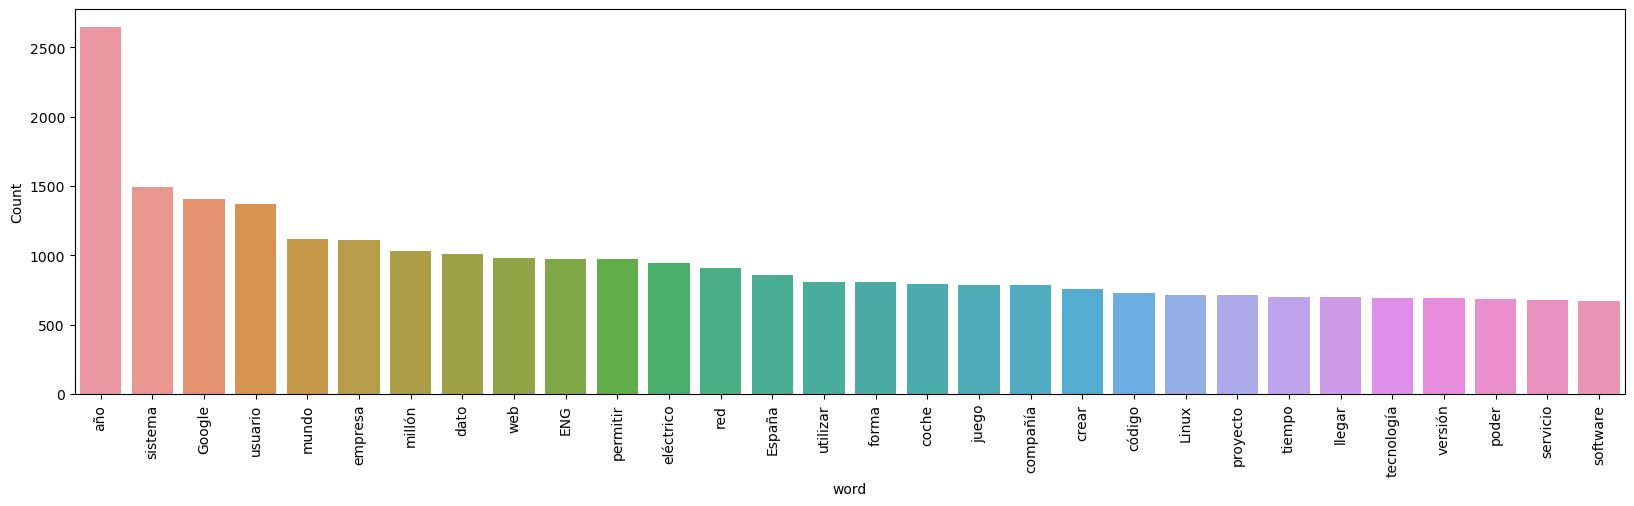

------------
Entertainment:


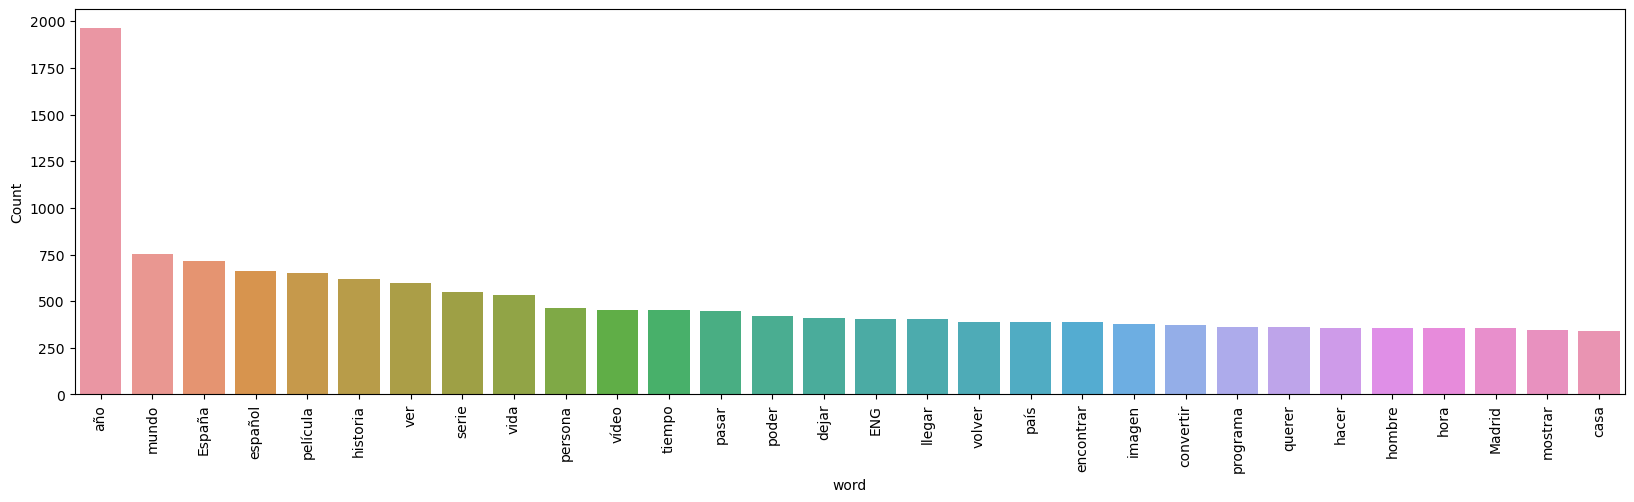

------------
Science:


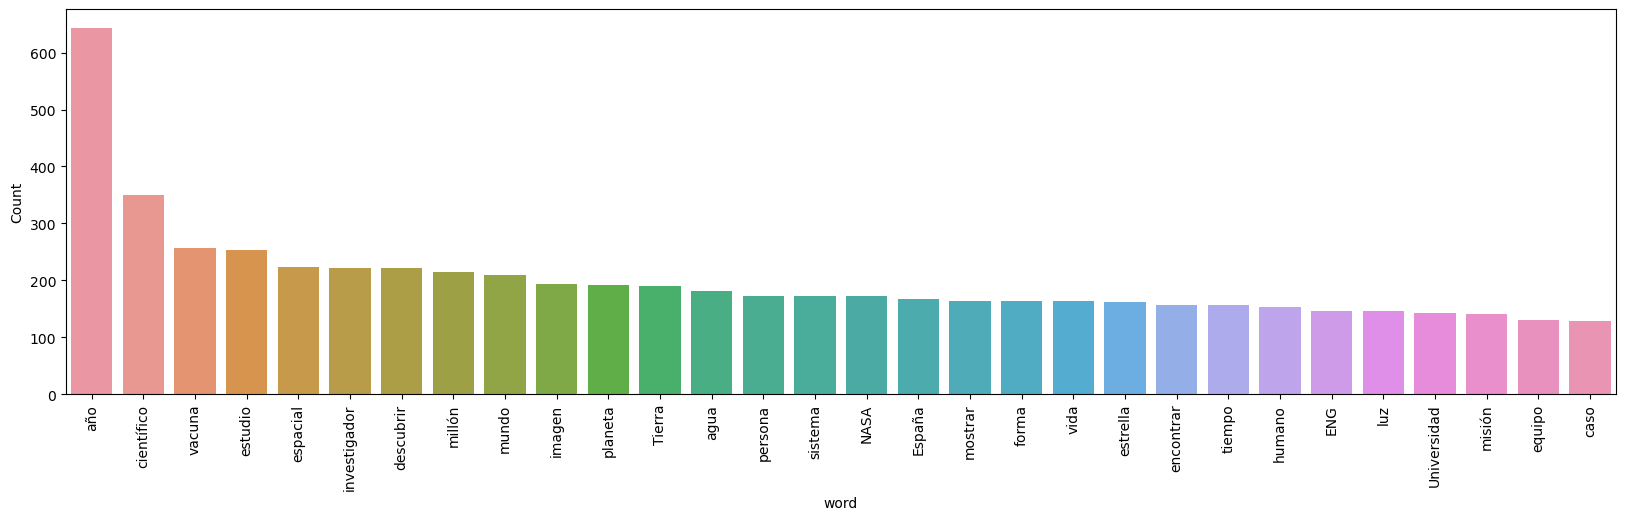

------------
Uncategorized:


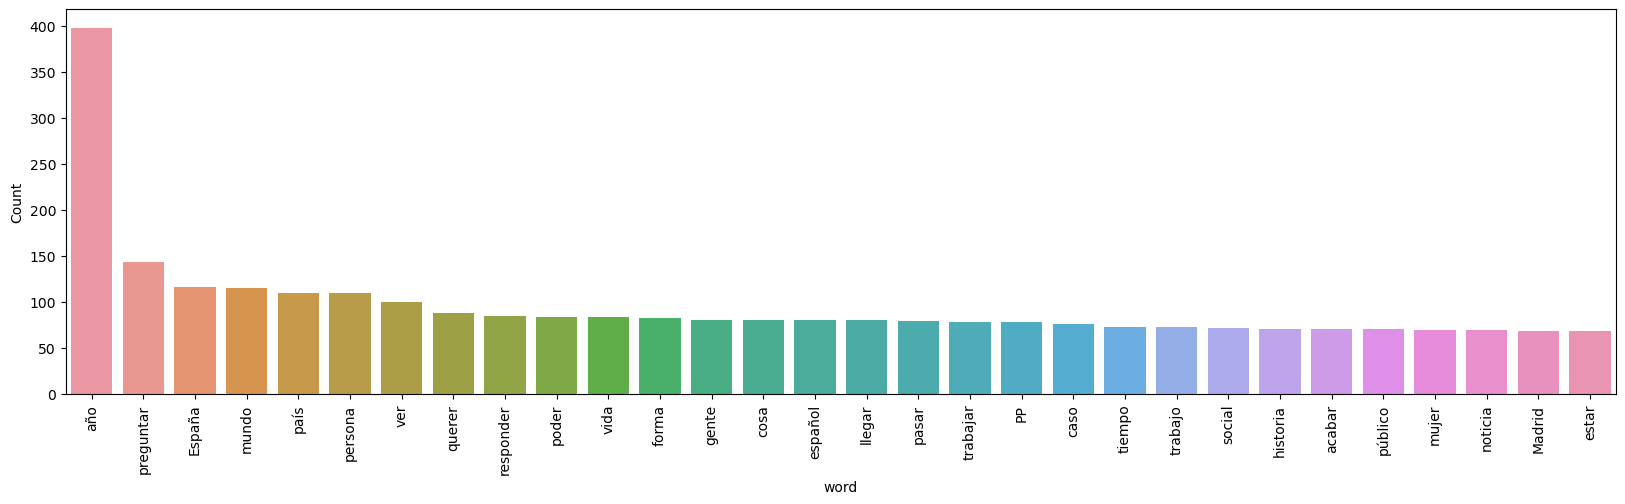

------------


In [46]:
## Repeat the same plot filtering by category.
for category in df['category'].unique():
    print(f'{category}:')
    freq_words(df['token_lemma_relevant'].loc[df['category']==category], terms=30)
    print('------------')

# Save File

In [27]:
df.to_csv('../DATA/news_125k-tokens-relevant.csv')